<a href="https://colab.research.google.com/github/debasisb/covid-19-Hawaii/blob/master/Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.tail()

,date,state,fips,cases,deaths
2268,2020-04-12,Virginia,51,5274,141
2269,2020-04-12,Washington,53,10411,511
2270,2020-04-12,West Virginia,54,615,8
2271,2020-04-12,Wisconsin,55,3341,145
2272,2020-04-12,Wyoming,56,270,0


In [4]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [6]:
df.shape

(2273, 5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


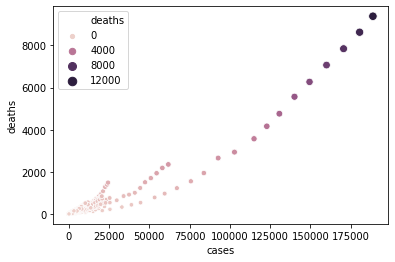

In [7]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-04-12', '2020-04-12', '2020-04-12', '2020-04-12',
               '2020-04-12', '2020-04-12', '2020-04-12', '2020-04-12',
               '2020-04-12', '2020-04-12'],
              dtype='datetime64[ns]', name='date', length=2273, freq=None)

In [9]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-04-13
Two days ago 2020-04-11


In [10]:
df.loc[daybefore:today].head(10)

,state,fips,cases,deaths
date,,,,
2020-04-11,Alabama,1,3262,93
2020-04-11,Alaska,2,255,6
2020-04-11,American Samoa,60,0,0
2020-04-11,Arizona,4,3393,112
2020-04-11,Arkansas,5,1228,25
2020-04-11,California,6,22421,632
2020-04-11,Colorado,8,6893,274
2020-04-11,Connecticut,9,11510,494
2020-04-11,Delaware,10,1479,33


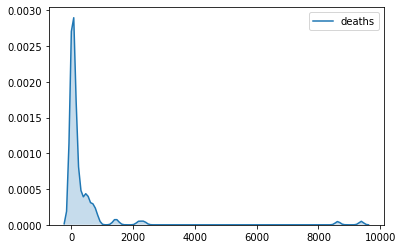

In [11]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

In [12]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-12,New York,36,188694,9385
2020-04-11,New York,36,180458,8627
2020-04-12,New Jersey,34,61850,2350
2020-04-11,New Jersey,34,58151,2183
2020-04-12,Michigan,26,24494,1486
2020-04-11,Michigan,26,23853,1391
2020-04-12,Louisiana,22,20595,840
2020-04-11,Louisiana,22,20014,806
2020-04-12,Massachusetts,25,25475,756


In [15]:
current_df.shape

(112, 4)

In [16]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New York',
 'New Jersey',
 'New Jersey',
 'Michigan',
 'Michigan',
 'Louisiana',
 'Louisiana',
 'Massachusetts',
 'Illinois']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [18]:
set(top_states_df.state.values)

{'Illinois',
 'Louisiana',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York'}

<Figure size 1080x360 with 0 Axes>

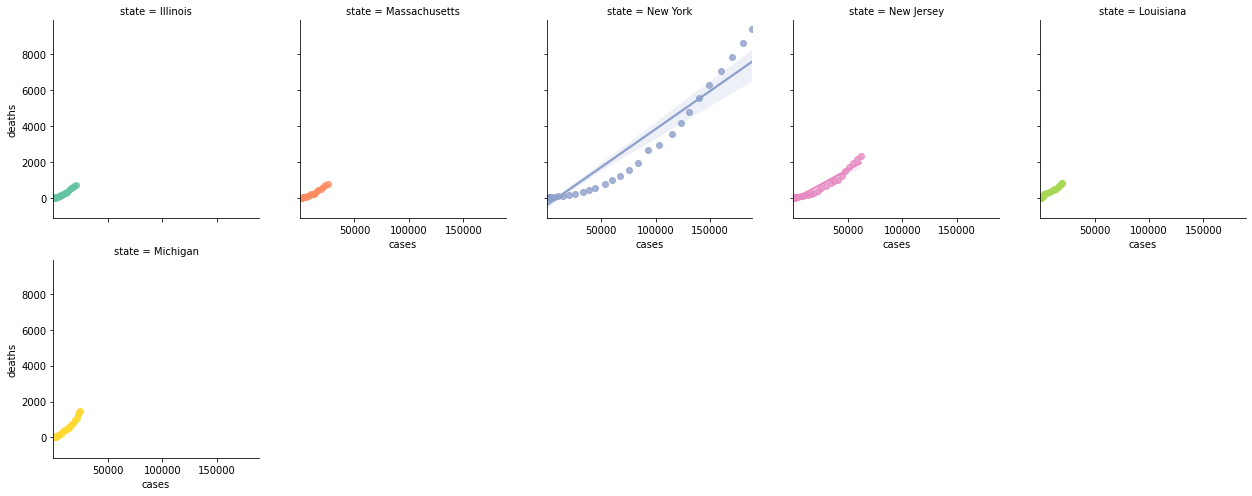

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [20]:
top_states_april_current_df = top_states_df.loc["2020-04-10":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head(10)

,state,cases,deaths
date,,,
2020-04-12,New York,188694,9385
2020-04-11,New York,180458,8627
2020-04-10,New York,170512,7844
2020-04-12,New Jersey,61850,2350
2020-04-11,New Jersey,58151,2183
2020-04-10,New Jersey,54588,1932
2020-04-12,Michigan,24494,1486
2020-04-11,Michigan,23853,1391
2020-04-10,Michigan,22646,1280


In [21]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_april_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

Import County Level Data for Hawaii

In [22]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df["state"].shape
df = df[df["state"] == "Hawaii"]
df.tail(10)

,date,county,state,fips,cases,deaths
49023,2020-04-11,Hawaii,Hawaii,15001.0,34,0
49024,2020-04-11,Honolulu,Hawaii,15003.0,348,5
49025,2020-04-11,Kauai,Hawaii,15007.0,19,0
49026,2020-04-11,Maui,Hawaii,15009.0,80,3
49027,2020-04-11,Unknown,Hawaii,NaN,3,0
51684,2020-04-12,Hawaii,Hawaii,15001.0,39,0
51685,2020-04-12,Honolulu,Hawaii,15003.0,350,6
51686,2020-04-12,Kauai,Hawaii,15007.0,21,0
51687,2020-04-12,Maui,Hawaii,15009.0,84,3
51688,2020-04-12,Unknown,Hawaii,NaN,3,0


In [23]:
Maui_County_df = df[df["county"]== "Maui"].drop(columns = "fips")
Maui_County_df.tail(10)

,date,county,state,cases,deaths
28971,2020-04-03,Maui,Hawaii,36,0
31334,2020-04-04,Maui,Hawaii,38,0
33742,2020-04-05,Maui,Hawaii,43,0
36196,2020-04-06,Maui,Hawaii,44,1
38688,2020-04-07,Maui,Hawaii,48,1
41230,2020-04-08,Maui,Hawaii,54,1
43796,2020-04-09,Maui,Hawaii,57,2
46395,2020-04-10,Maui,Hawaii,66,3
49026,2020-04-11,Maui,Hawaii,80,3
51687,2020-04-12,Maui,Hawaii,84,3


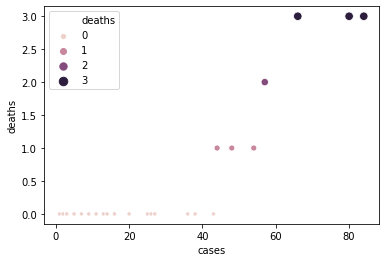

In [24]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Maui_County_df)

<Figure size 1080x360 with 0 Axes>

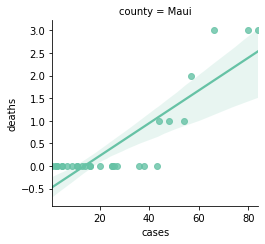

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Maui_County_df)
ax.fig.subplots_adjust(wspace=.2)

In [26]:
Honolulu_County_df = df[df["county"]== "Honolulu"].drop(columns = "fips")
Honolulu_County_df.tail(10)

,date,county,state,cases,deaths
28969,2020-04-03,Honolulu,Hawaii,237,2
31332,2020-04-04,Honolulu,Hawaii,266,2
33740,2020-04-05,Honolulu,Hawaii,281,2
36194,2020-04-06,Honolulu,Hawaii,292,4
38686,2020-04-07,Honolulu,Hawaii,312,4
41228,2020-04-08,Honolulu,Hawaii,328,4
43794,2020-04-09,Honolulu,Hawaii,334,4
46393,2020-04-10,Honolulu,Hawaii,343,5
49024,2020-04-11,Honolulu,Hawaii,348,5
51685,2020-04-12,Honolulu,Hawaii,350,6


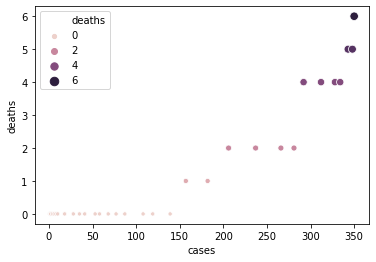

In [27]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Honolulu_County_df)

<Figure size 1080x360 with 0 Axes>

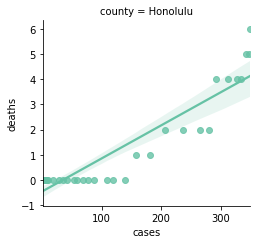

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Honolulu_County_df)
ax.fig.subplots_adjust(wspace=.2)